In [ ]:
# Preparamos nuestro entorno de trabajo 
!pip install spacy
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install wordcloud
!pip install BeautifulSoup4

# Descarga el modelo de lenguaje español 
!python -m spacy download es_core_news_sm

# Importar librerías a usar
import spacy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random 
import requests
import xml.etree.ElementTree as ET

from bs4 import BeautifulSoup
from spacy.lang.es.examples import sentences 
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Web Scraping de Criptonoticias

In [ ]:
# Listas de urls a Scrapear
lista_urls = ['https://www.criptonoticias.com/post-sitemap23.xml',
        'https://www.criptonoticias.com/post-sitemap24.xml', 
        'https://www.criptonoticias.com/post-sitemap25.xml', 
        'https://www.criptonoticias.com/post-sitemap26.xml', 
        'https://www.criptonoticias.com/post-sitemap27.xml']

for url in lista_urls: 

  # Descargamos el sitemap
  r = requests.get(url)

  # Creamos un objeto BeautifulSoup a partir del sitemap descargado
  soup = BeautifulSoup(r.text, 'html.parser')

  # Buscamos todas las URL del sitemap
  urls = soup.find_all('loc')

  titles = []

  # Recorremos cada una de las URL del sitemap
  for url in urls:
    try:
      # Descargamos el contenido de la URL
      r = requests.get(url.text)

      # Creamos un objeto BeautifulSoup a partir del contenido descargado
      soup = BeautifulSoup(r.text, 'html.parser')

      # Buscamos el título del artículo (etiqueta h1 con clase jeg_post_title)
      title = soup.find('h1', class_='jeg_post_title')

      # Si encontramos el título, lo mostramos por pantalla
      if title:
        titles.append(title.text)
    except: 
      continue

  titles_pd = pd.DataFrame(titles)
  titles_pd.to_csv('titles.csv', index=False)

# Preprocesamiento de texto

In [10]:
# Carga el modelo de lenguaje en español de spacy
nlp = spacy.load("es_core_news_sm")

# Abre el archivo de texto y lo lee en una variable
with open("titles.csv", "r", newline='\n', encoding='utf-8') as f:
    texto = [linea.rstrip() for linea in f]
    texto = ' '.join(texto)

# Procesa el texto con spacy
doc = nlp(texto)

# Remueve las palabras vacías y sígnos de puntuación
words = [token.text.lower() for token in doc if token.is_stop == False and token.is_punct == False and token.like_num == False and token.is_alpha == True]

# Algunas normalizaciones
words = list(map(lambda x: x.replace('btc', 'bitcoin'), words))
words = list(map(lambda x: x.replace('bitcoins', 'bitcoin'), words))
words = list(map(lambda x: x.replace('exchanges', 'exchange'), words))
words = list(map(lambda x: x.replace('criptomonedas', 'criptomoneda'), words))
words = list(map(lambda x: x.replace('impuestos', 'impuesto'), words))
words = list(map(lambda x: x.replace('buterin', 'vitalik'), words))
words = list(map(lambda x: x.replace('dólares', 'dólar'), words))

words_string = ' '.join(words)

# Devuelve la frecuencia de las palabras
word_freq = Counter(words)

# WordCloud

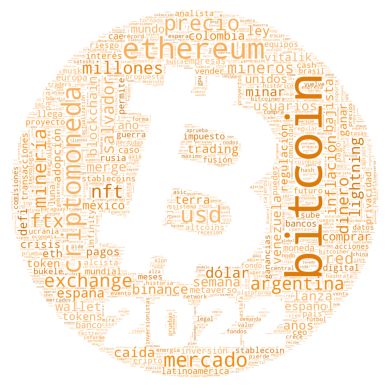

In [14]:
mask = np.array(Image.open("logo_bitcoin.png"))
mask[mask == 1] = 255

wordcloud = WordCloud(background_color = "white",
                      max_words = 2000, 
                      width=3000, 
                      height=3000, 
                      mask = mask, 
                      max_font_size=160,
                      random_state=1).generate_from_frequencies(word_freq)

def orange_colors(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl(32, 93%, {random.randint(40,70)}%)"

plt.imshow(wordcloud.recolor(color_func=orange_colors, random_state=4))

# Imprimir
plt.axis("off")
plt.savefig("Bitcoin_2022.png", format="png", dpi=500)
plt.show()